In [10]:
import pywt
import numpy as np
import misc
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.signal import decimate, hanning, convolve, spectrogram

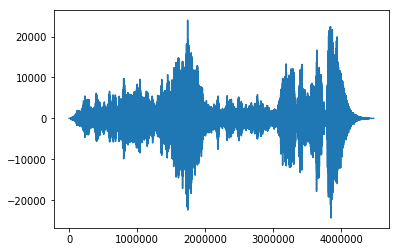

In [11]:
%matplotlib inline
fs, signal = wav.read('Degussy - Etude pour les huit doigts(1).wav')
signal = signal
plt.plot(signal)


In [12]:
db10 = pywt.Wavelet('db12')

In [13]:
n_levels = 5
coefs = pywt.wavedec(signal, db10, level=n_levels)

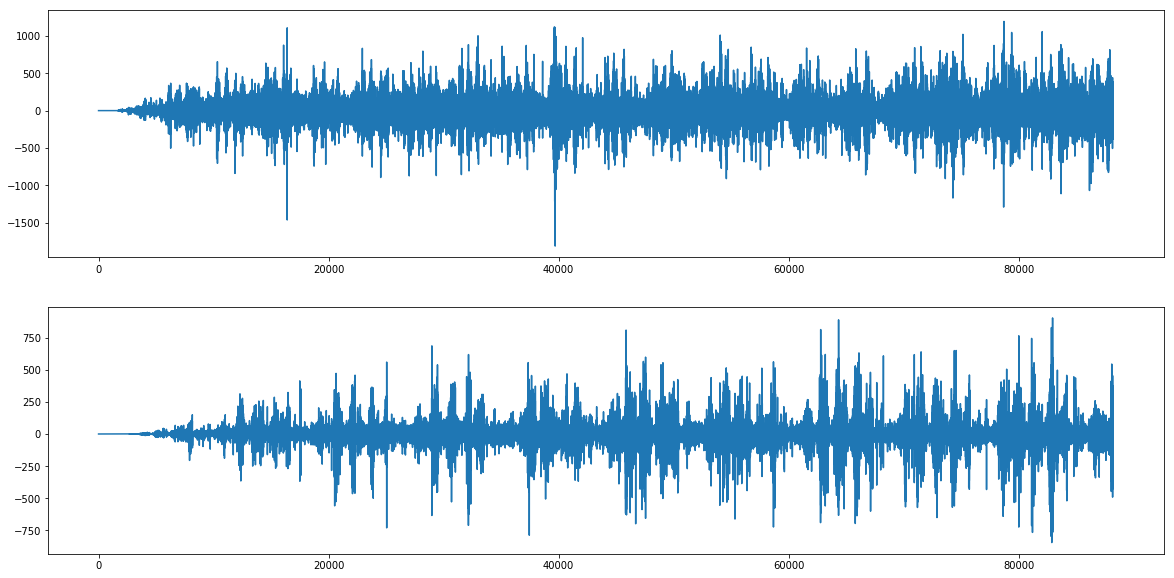

In [14]:
def max_cut(signal,window):
    for i in range(signal.shape[0]):
        if i % int(signal.shape[0]/10) == 0:
            print(i),
        if i < window:
            thres = signal[i:int(i+window/2)].std()
        else:
            thres = signal[int(i-window/2):int(i+window/2)].std()
        thres += thres/2
        if abs(signal[i]) > thres:
            signal[i] = 0
    return signal

fig, axes = plt.subplots(nrows=2, figsize=(20,10))
axes[0].plot(coefs[3][:2*44100])
axes[1].plot(coefs[4][:2*44100])

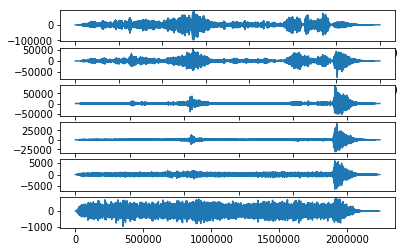

In [6]:
fig, axes = plt.subplots(nrows=n_levels + 1)
for ax, coef in zip(axes,coefs):
    ax.plot(coef)
    

In [15]:
# for i, _ in enumerate(coefs):
#     if i >= n_levels - 4 and i < n_levels - 1:
#         coefs[i] *=0
coefs[4] = max_cut(coefs[4], 44100)
coefs[3] = max_cut(coefs[3], 44100)
coefs[5] = max_cut(coefs[5], 44100)
coefs[2] = max_cut(coefs[2], 44100)
# coefs[1] = max_cut(coefs[1], 44100)
# coefs[4] = max_cut(coefs[4], 44100)
# coefs[3] = max_cut(coefs[3], 44100)
restored_signal = pywt.waverec(coefs, db10)
write('restored.wav', fs, restored_signal)

0
111927
223854
335781
447708
559635
671562
783489
895416
1007343
1119270
0
55964
111928
167892
223856
279820
335784
391748
447712
503676
559640
0
223852
447704
671556
895408
1119260
1343112
1566964
1790816
2014668
2238520
0
27983
55966
83949
111932
139915
167898
195881
223864
251847
279830


In [16]:
restored_signal = pywt.waverec(coefs, db10)
restored_signal = np.array(restored_signal, dtype='int16')
write('restored.wav', fs, restored_signal)


In [8]:
from scipy.signal import wiener

restored_signalW = wiener(restored_signal, 44100, 10*restored_signal[44100].std())
restored_signalW = np.array(restored_signalW, dtype='int16')
write('restored.wav', fs, restored_signalW)

C:\Users\pedro\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
